# ExtraaLearn Lead Conversion Analysis
**Logan Walker**

**March 31st, 2025**

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Importing necessary libraries and data**

In [175]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tuning
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Observations
- Sanity checks

In [177]:
# Load the dataset
df = pd.read_csv('/ExtraaLearn (1).csv')

# Preview the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [178]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nData types:")
print(df.dtypes)

# Check for null values
print("\nMissing values:")
print(df.isnull().sum())

# Target variable distribution
print("\nTarget variable distribution (status):")
print(df['status'].value_counts(normalize=True))

# Summary statistics
df.describe()

Shape of dataset: (4612, 15)

Data types:
ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

Missing values:
ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Target variab

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


## **Summarizing What We Know:**
Shape:
4612 rows and 15 columns — nice size!

**Missing Values:**
None - we do not need to do imputation right now.

**Data Types:**
ID will be dropped (not useful for modeling)

-Several columns are categorical (object) and will need encoding

-Target column (status) is numeric and fine as-is

-Target Distribution:
0 (non-converted): 70.1%

-1 (converted): 29.9%
This is mildly imbalanced — not super severe, may consider techniques like SMOTE later if needed.

**Feature Check:**
time_spent_on_website has a wide range (0 to 2500+) → might need scaling or log transformation

-page_views_per_visit goes up to ~18, which is an outlier to watch

-website_visits has a max of 30, but median is 3 → some users might be over-engaged

In [179]:
# Drop the ID column
# unique identifier
# no predicitve value
df.drop('ID', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Summary of relevant clumns for questions:**

current_occupation - Used for Q1

first_interaction - Used for Q2

last_activity - Can be used for Q3 (mode of interaction)

print_media_type1, print_media_type2, digital_media, educational_channels, referral - All relevant to Q4

profile_completed - Useful for Q5 (how much info a lead provided)

status - Target variable (1 = Converted, 0 = Not Converted)

## **Univariate Analysis**

## **1. Does the current occupation affect lead conversion?**

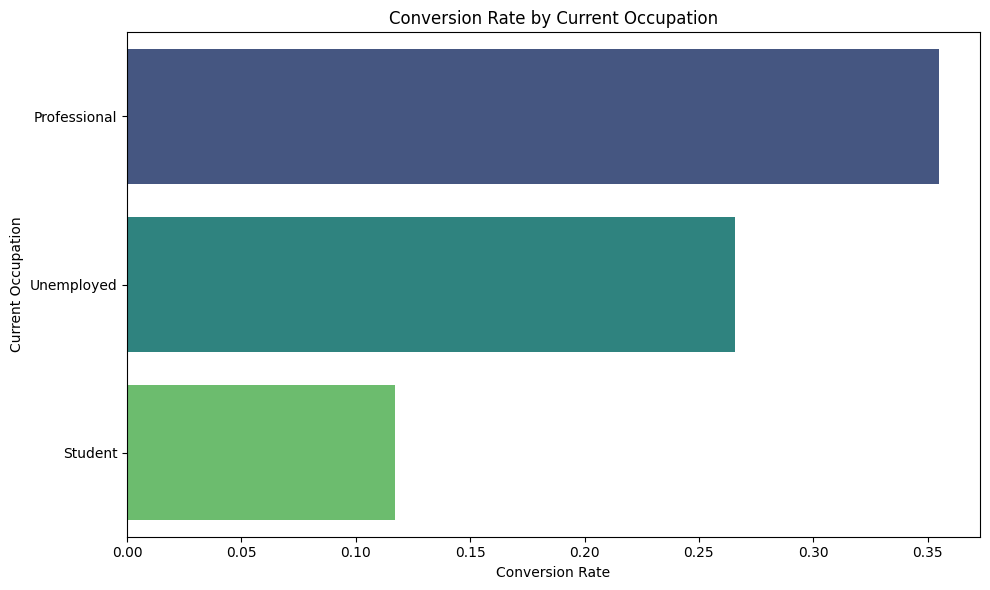

In [180]:
# Plotting conversion rate by current occupation
# Group by current occupation and calculate conversion rate (mean of 'status')
occupation_conversion = df.groupby('current_occupation')['status'].mean().sort_values(ascending=False).reset_index()

# Plotting conversion rate by occupation
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='current_occupation', data=occupation_conversion, palette='viridis')
plt.xlabel('Conversion Rate')
plt.ylabel('Current Occupation')
plt.title('Conversion Rate by Current Occupation')
plt.tight_layout()
plt.show()


In [181]:
df.groupby('current_occupation')['status'].mean()

,status
current_occupation,
Professional,0.355122
Student,0.117117
Unemployed,0.265788


**Insight:**

-Professionals convert at the highest rate (~35.5%) among all occupations.

-Unemployed leads are next (~26.6%).

Students have the lowest conversion rate (~11.7%).

-Professionals are the most promising group here — possibly because they are actively looking to upskill.

## **2. Do first channels of interaction impact lead status?**

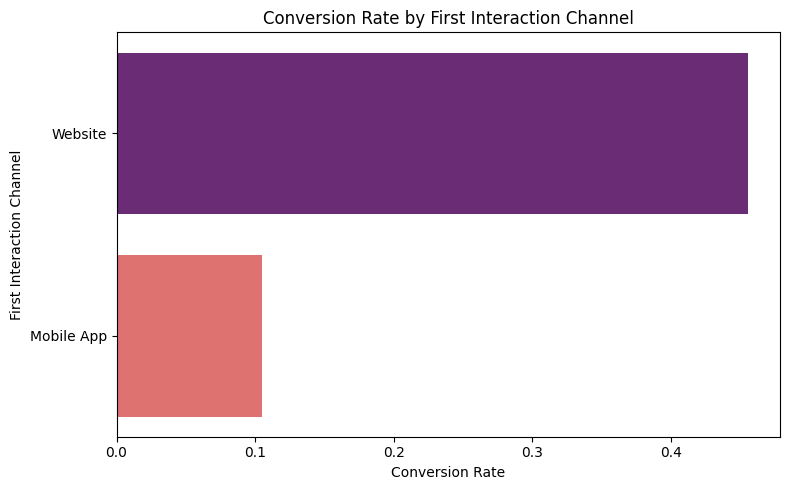

first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64


In [182]:
# Calculating conversion rate by first interaction
interaction_conversion = df.groupby('first_interaction')['status'].mean().sort_values(ascending=False).reset_index()

# Plotting conversion rate
plt.figure(figsize=(8, 5))
sns.barplot(x='status', y='first_interaction', data=interaction_conversion, palette='magma')
plt.xlabel('Conversion Rate')
plt.ylabel('First Interaction Channel')
plt.title('Conversion Rate by First Interaction Channel')
plt.tight_layout()
plt.show()

# Check volume of leads from each channel
print(df['first_interaction'].value_counts())

In [183]:
print(df.groupby('first_interaction')['status'].mean())

first_interaction
Mobile App    0.105314
Website       0.455940
Name: status, dtype: float64


**Insights:**

-Leads who first interacted via the Website convert at a much higher rate (~45.6%)

-Mobile App users convert far less (~10.5%)

**Summary:**

-First interaction channel has a major influence on conversion.

-Leads from the Website are far more likely to convert than those from the Mobile App, indicating that web users may be more committed or better informed.

-This insight suggests optimizing the Website experience may yield better conversion outcomes

## **3. Which last. activity (way of interaction) works best?**

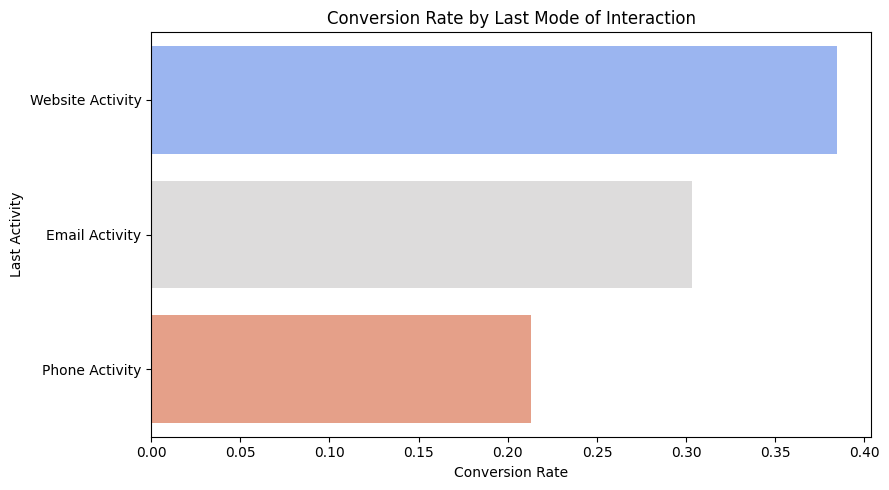

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64


In [184]:
# Calculating conversion rate by last activity
activity_conversion = df.groupby('last_activity')['status'].mean().sort_values(ascending=False).reset_index()

# Plotting conversion rate
plt.figure(figsize=(9, 5))
sns.barplot(x='status', y='last_activity', data=activity_conversion, palette='coolwarm')
plt.xlabel('Conversion Rate')
plt.ylabel('Last Activity')
plt.title('Conversion Rate by Last Mode of Interaction')
plt.tight_layout()
plt.show()

# Volume of last activities
print(df['last_activity'].value_counts())

In [185]:
df.groupby('last_activity')['status'].mean()

,status
last_activity,
Email Activity,0.303336
Phone Activity,0.213128
Website Activity,0.384545


**Insight:**

-Website Activity leads convert the most (~38.5%).

-Followed by Email Activity (~30.3%).

-Phone Activity shows the lowest conversion (~21.3%).

**Summary:**

-Surprisingly, Website Activity has the highest conversion rate — indicating that leads who self-navigate or use live chat may be more proactive.

-Phone Activity, despite being more personal, results in lower conversion.

-These findings suggest that empowering leads through self-service or digital engagement could drive better outcomes.

## **4. Which channels (print media, digital, referrals, etc) have the highest conversion rate?**

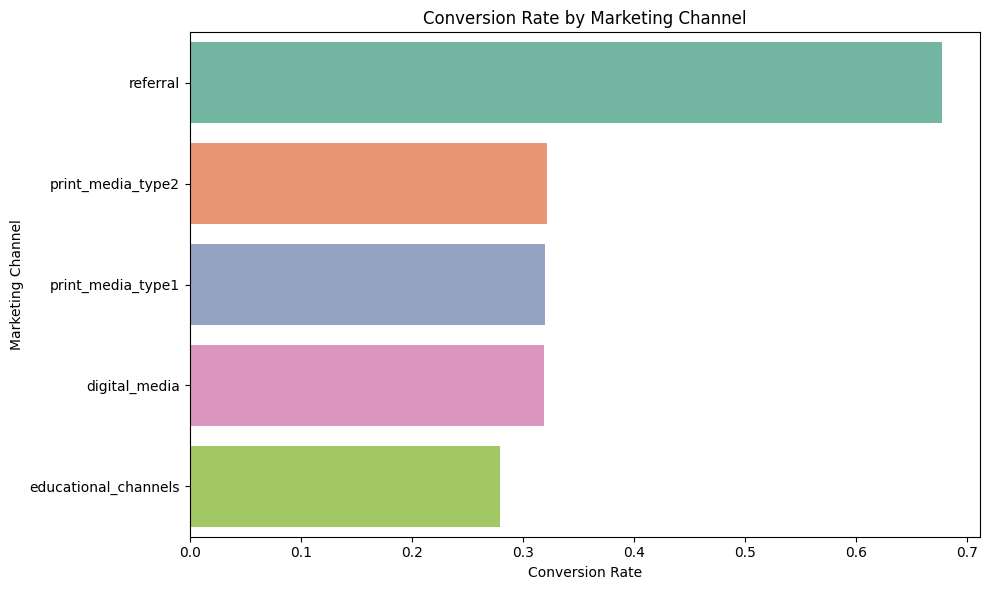

,Channel,Conversion Rate,Lead Count
4,referral,0.677419,93
1,print_media_type2,0.321888,233
0,print_media_type1,0.319920,497
2,digital_media,0.318786,527
3,educational_channels,0.279433,705


In [186]:
# Defining the list of marketing channel columns to evaluate
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Initializing an empty list to collect summary data
channel_data = []

# Looping through each channel
for channel in channels:
    # Filtering leads who were exposed to the channel (i.e., value is 'Yes')
    exposed = df[df[channel] == 'Yes']

    # Calculating conversion rate and lead count
    conv_rate = exposed['status'].mean()
    lead_count = exposed.shape[0]

    # Appending to the results list
    channel_data.append({
        'Channel': channel,
        'Conversion Rate': conv_rate,
        'Lead Count': lead_count
    })

# Creating a DataFrame from the collected data
channel_df = pd.DataFrame(channel_data)

# Sorting by highest conversion rate
channel_df = channel_df.sort_values(by='Conversion Rate', ascending=False)

# Plotting the conversion rates by channel
plt.figure(figsize=(10, 6))
sns.barplot(x='Conversion Rate', y='Channel', data=channel_df, palette='Set2')
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Displaying the summary table with conversion rates and counts
display(channel_df)

**Insight:**

-Referrals are by far the most effective — converting more than 2 out of 3 leads.

-Print media (both newspaper and magazine) also performs surprisingly well — slightly better than digital channels.

-Digital media and educational platforms have decent performance but are more volume-based.

**Summary:**

-Among all channels, referrals show the highest lead conversion rate (67.7%), making them the most reliable source of high-quality leads.
-While digital media and educational platforms bring in more leads, their conversion rates are moderate (~28–32%).
-Interestingly, print media outperforms expectations, indicating traditional methods still hold value in certain demographics


## **5. Does having more details about a prospect increase the chances of conversion?**

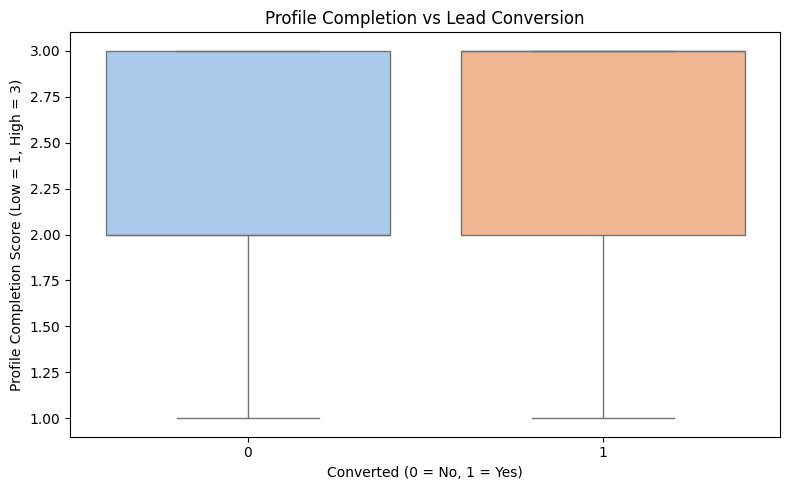

Conversion Rate by Profile Completion Level:
profile_completed
High      0.417845
Low       0.074766
Medium    0.188755
Name: status, dtype: float64


In [187]:
# Mapping textual levels to numeric for visualization
profile_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['profile_score'] = df['profile_completed'].map(profile_map)

# Plotting a boxplot to show how profile completion relates to conversion
plt.figure(figsize=(8, 5))
sns.boxplot(x='status', y='profile_score', data=df, palette='pastel')
plt.title('Profile Completion vs Lead Conversion')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Profile Completion Score (Low = 1, High = 3)')
plt.tight_layout()
plt.show()

# Checking conversion rate by profile completion level (Low, Medium, High)
conversion_by_profile = df.groupby('profile_completed')['status'].mean()
print("Conversion Rate by Profile Completion Level:")
print(conversion_by_profile)

**Insight:**

-There’s a direct, positive correlation between how much of their profile a lead completes and their likelihood to convert.

-Leads with a High profile completion rate are nearly 6x more likely to convert than those with Low completion.

-This suggests that engagement level (as measured by profile completion) is a strong indicator of conversion readiness.

**Summary:**

-Leads with a high level of profile completion convert at a rate of 41.8%, compared to just 7.5% for those with low completion.
-This demonstrates that profile completion is a strong signal of lead engagement and interest, and could be used as a key feature in the predictive model.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## **1. Checking for Nulls or Duplicates**

In [188]:
# Checking for missing values
print("Missing Values:\n")
print(df.isnull().sum())

# Checking for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
profile_score            0
dtype: int64

Duplicate Rows: 14


In [189]:
# Dropping exact duplicate rows
df = df.drop_duplicates()

# Confirming shape after dropping
print("New shape after removing duplicates:", df.shape)

New shape after removing duplicates: (4598, 15)


## **2. Encoding Categorical Variables**

In [190]:
# Mappng profile completion levels to numeric values (ordinal)
profile_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['profile_completed'] = df['profile_completed'].map(profile_map)

# Checking if it worked
print(df['profile_completed'].value_counts())

profile_completed
3    2255
2    2236
1     107
Name: count, dtype: int64


In [191]:
# convert binary columns Yes/No columns into 1/0
# List of binary columns with 'Yes'/'No' values
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Map 'Yes' to 1 and 'No' to 0
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Quick check to make sure mapping worked
print(df[binary_cols].head())

   print_media_type1  print_media_type2  digital_media  educational_channels  \
0                  1                  0              1                     0   
1                  0                  0              0                     1   
2                  0                  0              1                     0   
3                  0                  0              0                     0   
4                  0                  0              0                     0   

   referral  
0         0  
1         0  
2         0  
3         0  
4         0  


In [192]:
# One-Hot Encode Nominal Categorical Features
# List of nominal (non-ordinal) categorical columns
nominal_cols = ['current_occupation', 'first_interaction', 'last_activity']

# Apply one-hot encoding and drop the first category from each to avoid multicollinearity
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Check resulting column names
print("New columns after encoding:")
print(df.columns.tolist())

New columns after encoding:
['age', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status', 'profile_score', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Website', 'last_activity_Phone Activity', 'last_activity_Website Activity']


## **3. Scaling Numerical Features**

In [193]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale
numeric_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Initialize and apply scaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check summary stats after scaling
print(df[numeric_cols].describe())

                age  website_visits  time_spent_on_website  \
count  4.598000e+03    4.598000e+03           4.598000e+03   
mean  -3.476993e-17    3.090660e-18           7.649384e-17   
std    1.000109e+00    1.000109e+00           1.000109e+00   
min   -2.141378e+00   -1.265855e+00          -9.763536e-01   
25%   -7.735325e-01   -5.582076e-01          -7.676292e-01   
50%    3.663388e-01   -2.043837e-01          -4.688274e-01   
75%    8.222874e-01    5.032641e-01           8.275489e-01   
max    1.278236e+00    9.348861e+00           2.434491e+00   

       page_views_per_visit  
count          4.598000e+03  
mean          -8.190249e-17  
std            1.000109e+00  
min           -1.545648e+00  
25%           -4.864757e-01  
50%           -1.152561e-01  
75%            3.685007e-01  
max            7.841269e+00  


**Summary:**

-All four numeric features now have:

1) Mean ≈ 0

2) Standard deviation ≈ 1

The values are standardized but not clipped, meaning we preserve variance, which is great for modeling.

## **4. Check Class Balance**

In [194]:
# Check class distribution of the target variable
print("Class distribution (converted vs not converted):")
print(df['status'].value_counts(normalize=True))

Class distribution (converted vs not converted):
status
0    0.700957
1    0.299043
Name: proportion, dtype: float64


**Summary:**

Class Balance Breakdown:

1)70.1% of leads did not convert (status = 0)

2)29.9% of leads did convert (status = 1)

**Is this imbalanced:**

Technically, yes — it is mildly imbalanced

But it is not extreme (i.e, 90/10 or 95/5), so I am not going to oversample or use SMOTE yet.

**Finally:**

I will move forward with model training without worrying about imbalance right now.

Later I will:

1) Monitor precision, recall, and F1-score (not just accuracy)

2) Possibly explore class weighting if needed

## **5. Train-Test Split**

In [195]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('status', axis=1)
y = df['status']

# Perform train-test split (80/20), with stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the shape of the splits
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3678, 16)
Test set size: (920, 16)


## EDA

- It is a good idea to explore the data once again after manipulating it.

## **Bivariate Analaysis**

## **1. Correlation Heat Map**

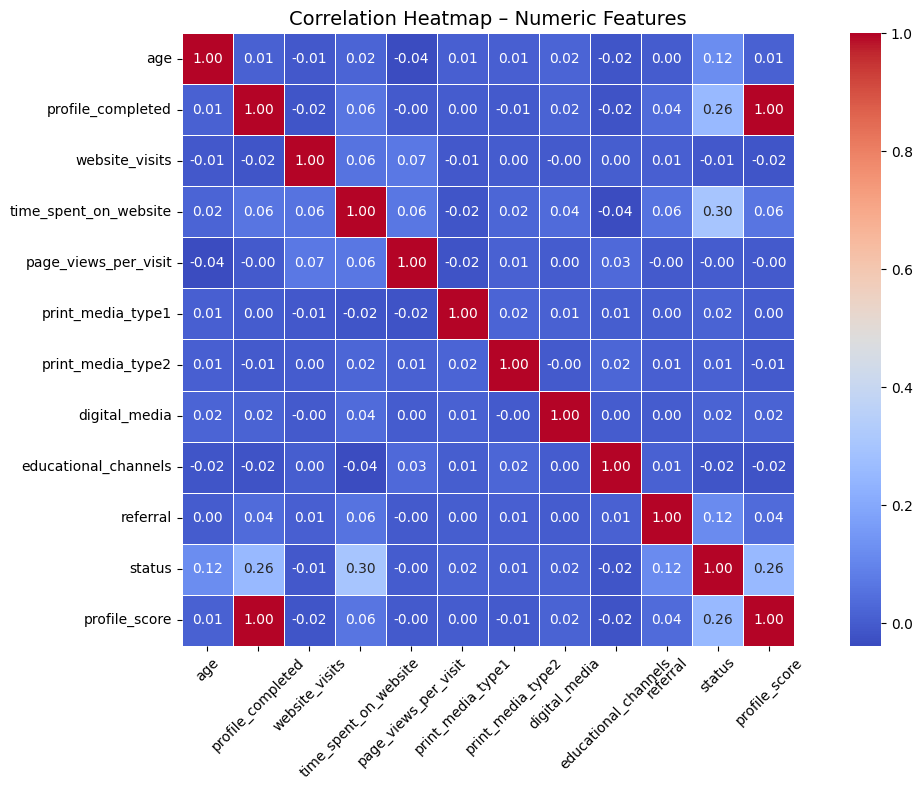

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation analysis
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Set plot size and aesthetics
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap – Numeric Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Summary:**

-The correlation heatmap shows that time spent on the website (0.30) and profile completion (0.26) have the strongest positive relationship with lead conversion.

-This indicates that leads who engage more with the platform — by spending time or completing profiles — are more likely to convert.

-There is no significant multicollinearity, making the dataset suitable for model training.

## **2. Boxplots of Numeric Features vs status**

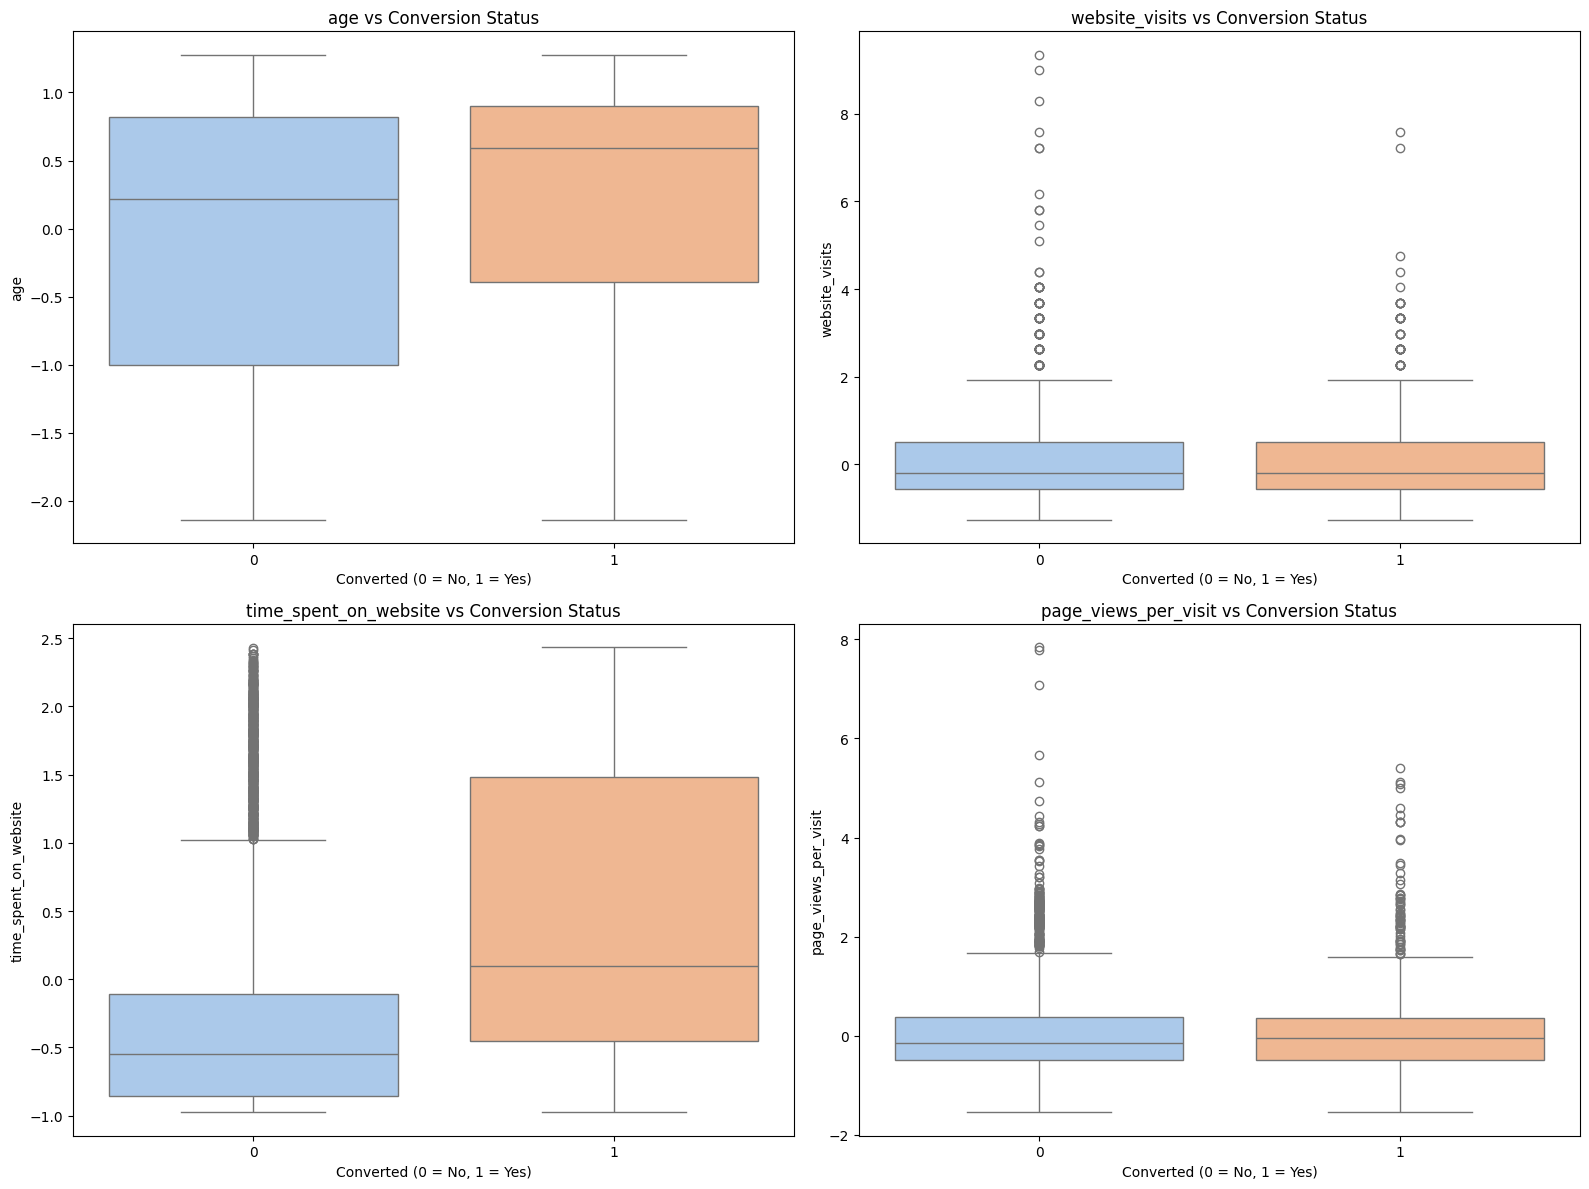

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric features to plot against status
num_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Set up plot grid
plt.figure(figsize=(16, 12))

# Loop through each numeric feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='status', y=feature, data=df, palette='pastel')
    plt.title(f'{feature} vs Conversion Status')
    plt.xlabel('Converted (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Summary:**

-Time spent on the website and pages viewed per visit are positively associated with conversion.

-On the other hand, total website visits do not show a meaningful difference.

-Age also has a slight effect, with older users converting more often.

-These findings reinforce that quality of engagement matters more than simple interaction counts.

## **3. Categorical Features vs Conversion Rate (status)**

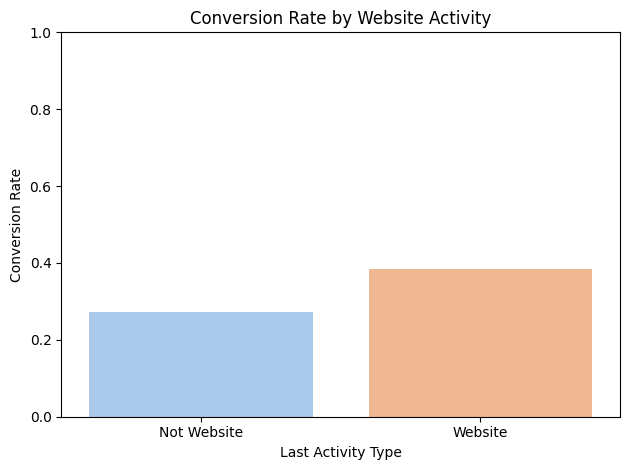

In [198]:
# Bar Plot: Conversion Rate by last_activity
# Calculate conversion rate by last activity
activity_conversion = df.groupby('last_activity_Website Activity')['status'].mean().reset_index()
activity_conversion.columns = ['Website Activity (1=True)', 'Conversion Rate']

# Plot bar chart
sns.barplot(x='Website Activity (1=True)', y='Conversion Rate', data=activity_conversion, palette='pastel')
plt.title('Conversion Rate by Website Activity')
plt.ylabel('Conversion Rate')
plt.xlabel('Last Activity Type')
plt.xticks([0, 1], ['Not Website', 'Website'])
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Phone Activity Conversion Rate: 21.32%
Website Activity Conversion Rate: 38.45%
Email Activity Conversion Rate: 30.41%


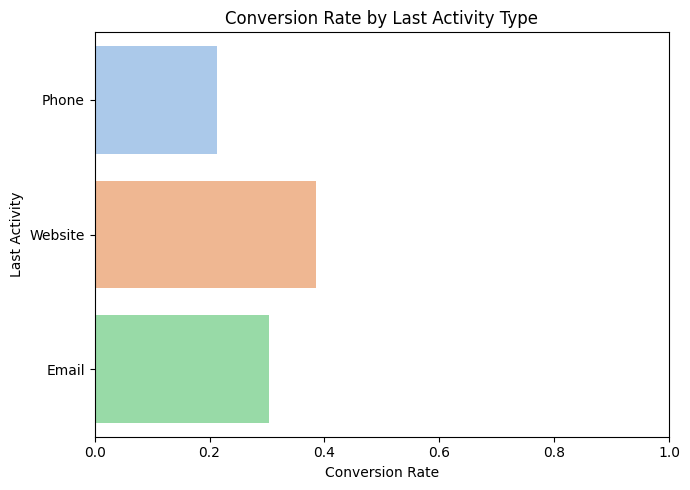

In [199]:
# 1. Conversion rate for leads whose last activity was Phone
phone_conv = df[df['last_activity_Phone Activity'] == 1]['status'].mean()
print(f"Phone Activity Conversion Rate: {phone_conv:.2%}")

# 2. Conversion rate for leads whose last activity was Website
web_conv = df[df['last_activity_Website Activity'] == 1]['status'].mean()
print(f"Website Activity Conversion Rate: {web_conv:.2%}")

# 3. Conversion rate for baseline category: Email (when both Phone & Website = 0)
email_conv = df[(df['last_activity_Phone Activity'] == 0) & (df['last_activity_Website Activity'] == 0)]['status'].mean()
print(f"Email Activity Conversion Rate: {email_conv:.2%}")

# Create a DataFrame manually for plotting
activity_df = pd.DataFrame({
    'Activity': ['Phone', 'Website', 'Email'],
    'Conversion Rate': [phone_conv, web_conv, email_conv]
})

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Conversion Rate', y='Activity', data=activity_df, palette='pastel')
plt.title('Conversion Rate by Last Activity Type')
plt.xlabel('Conversion Rate')
plt.ylabel('Last Activity')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

**Summary:**

-The last activity before conversion plays a significant role in predicting lead behavior.

-Leads whose last interaction was through the Website are the most likely to convert (~39%), followed by Email (~30%), and finally Phone (~21%).

-These insights suggest that Website-based interactions (e.g., live chat, profile update) reflect high engagement and intent, making them the most effective touchpoint for conversion.

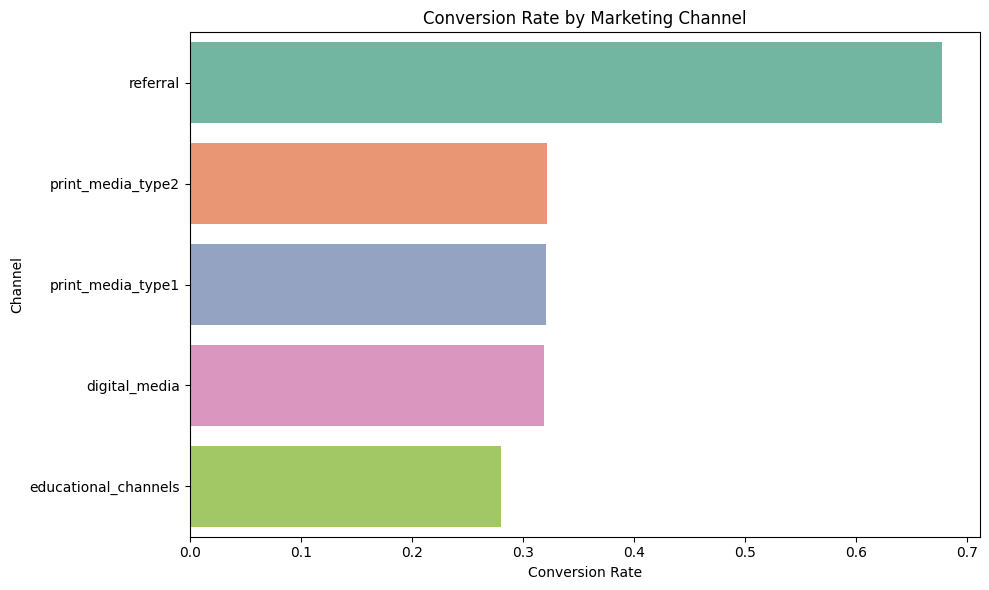

,Channel,Conversion Rate,Lead Count
4,referral,0.677419,93
1,print_media_type2,0.321888,233
0,print_media_type1,0.320565,496
2,digital_media,0.318786,527
3,educational_channels,0.279830,704


In [200]:
# Bar Plot: Conversion Rate by Marketing Channel
# Listing of binary marketing channel columns
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Build DataFrame of conversion rates
channel_stats = []

for ch in channels:
    rate = df[df[ch] == 1]['status'].mean()
    count = df[df[ch] == 1].shape[0]
    channel_stats.append({'Channel': ch, 'Conversion Rate': rate, 'Lead Count': count})

channel_df = pd.DataFrame(channel_stats).sort_values(by='Conversion Rate', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Conversion Rate', y='Channel', data=channel_df, palette='Set2')
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()

# Show the table for reporting
display(channel_df)

**Summary:**

-Referrals drive the highest conversion rate (~68%), making them the most valuable channel for acquiring high-intent leads.

-Interestingly, traditional media (newspapers and magazines) performs just as well as digital media, both converting at around 32%.

-Educational channels, despite being a targeted source, result in the lowest conversion rate (~28%), suggesting they bring more awareness-stage leads rather than decision-ready ones.

## Building a Decision Tree model

## **1. Train the Model**


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize a basic Decision Tree (unpruned)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **2. Make Predictions and Evaluate**

Training Accuracy: 0.9997281131049484
Test Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       645
           1       0.67      0.65      0.66       275

    accuracy                           0.80       920
   macro avg       0.76      0.76      0.76       920
weighted avg       0.80      0.80      0.80       920


Confusion Matrix:
 [[558  87]
 [ 97 178]]


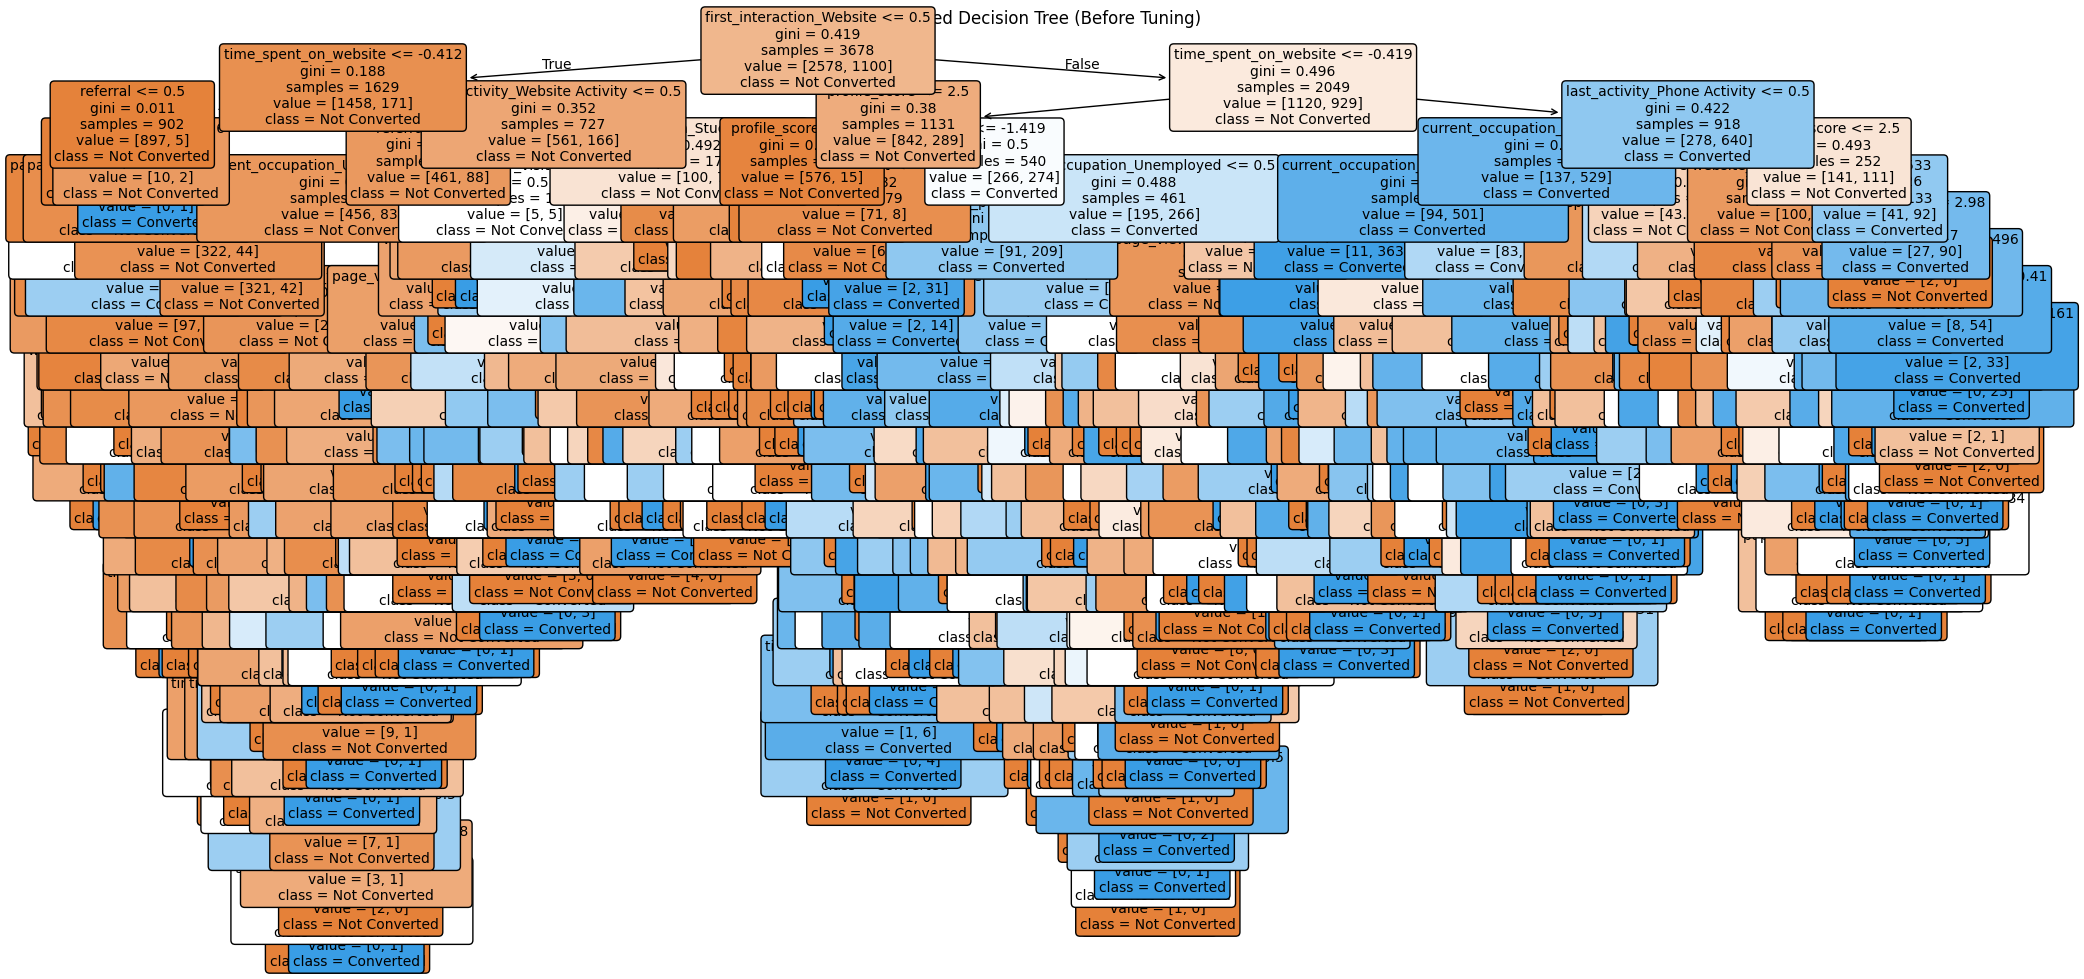

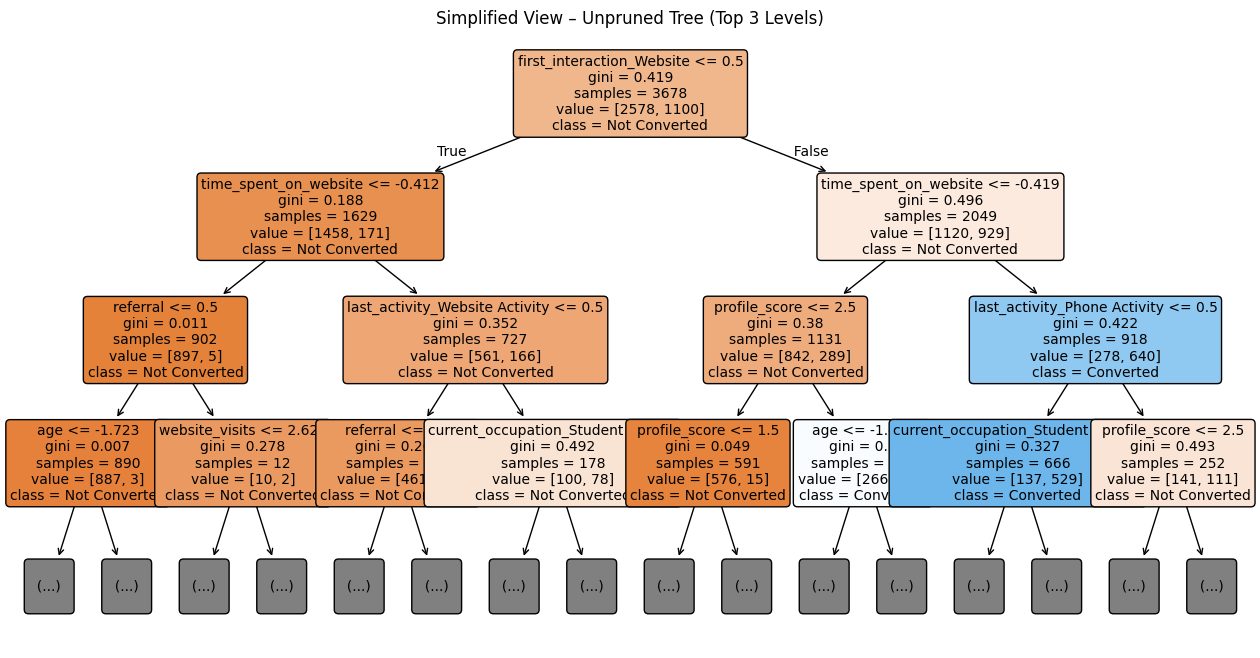

In [202]:
# Predicting on training and test sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Testing accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_acc)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the unpruned Decision Tree (before tuning)
# This shows what overfitting looks like with a very deep tree
plt.figure(figsize=(24, 12))
plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['Not Converted', 'Converted'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Unpruned Decision Tree (Before Tuning)")
plt.show()

# Showing only top levels of the unpruned tree to provide an option with less clutter.
plt.figure(figsize=(16, 8))
plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['Not Converted', 'Converted'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit to top 3 levels for cleaner view
          fontsize=10)
plt.title("Simplified View – Unpruned Tree (Top 3 Levels)")
plt.show()



## Interpretation of Unpruned Tree:

The unpruned Decision Tree generated an extremely deep and complex model, as visualized in the full tree diagram. While it achieved nearly perfect accuracy on the training set (99.97%), its performance dropped to 80% on the test set, signaling overfitting. The tree's depth and number of nodes made it difficult to interpret or generalize. This led to the decision to prune the tree using GridSearchCV, which improved test performance and model clarity.

## Model Performance Summary (Decision Tree Classifier):

-The initial Decision Tree model was trained without any pruning or hyperparameter tuning.

It achieved a training accuracy of 99.97%, but only a test accuracy of 80%, indicating a significant performance gap and clear signs of overfitting. The model appears to memorize patterns in the training data, which compromises its ability to generalize to new, unseen data.

**Classification Report:**

**Class 0 (Not Converted):**

1. Precision: 0.85

2. Recall: 0.87

**F1-score:**

0.86
- This class performs very well due to its majority representation in the data.

**Class 1 (Converted):**

1. Precision: 0.67

2. Recall: 0.65

**F1-score: 0.66**

- Performance here is significantly weaker, which is concerning since identifying converted leads is the core business objective.

**Confusion Matrix**

- 97 high-value leads were missed (false negatives), reducing the model's utility in prioritizing potential customers.

- 87 leads were incorrectly predicted as conversions (false positives), which could mislead resource allocation.

**Key Issue: Overfitting:**

- The model performs almost perfectly on the training set but shows a noticeable drop in performance on the test set.

- This gap is an indicator of overfitting, especially in tree-based models with unrestricted depth.

**Recommednation:**
- To improve generalization and reduce overfitting, **pruning the tree is necessary**. I will do this by:

 - Limiting tree depth

 - Increasing minimum samples per split or leaf

 - Using GridSearchCV to find the best combination of hyperparameters

This will help build a more balanced and generalizable model, particularly for the minority class (converted leads).


## Do we need to prune the tree?

## **Decision Tree with GridSearchCV (Pruned)**

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining the hyperparameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 10, 15, None],            # Controls tree depth
    'min_samples_split': [2, 5, 10],              # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],                # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']              # Function to measure quality of split
}

# Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fitting on training data
grid_search.fit(X_train, y_train)

# Retrieving the best model
best_dt = grid_search.best_estimator_

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


## **Evaluating Tuned Model on Test Set**

In [204]:
# Predicting on test data
y_pred_tuned = best_dt.predict(X_test)

# Accuracy
print("Tuned Test Accuracy:", accuracy_score(y_test, y_pred_tuned))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

Tuned Test Accuracy: 0.8489130434782609

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       645
           1       0.74      0.76      0.75       275

    accuracy                           0.85       920
   macro avg       0.82      0.82      0.82       920
weighted avg       0.85      0.85      0.85       920


Confusion Matrix:
 [[573  72]
 [ 67 208]]


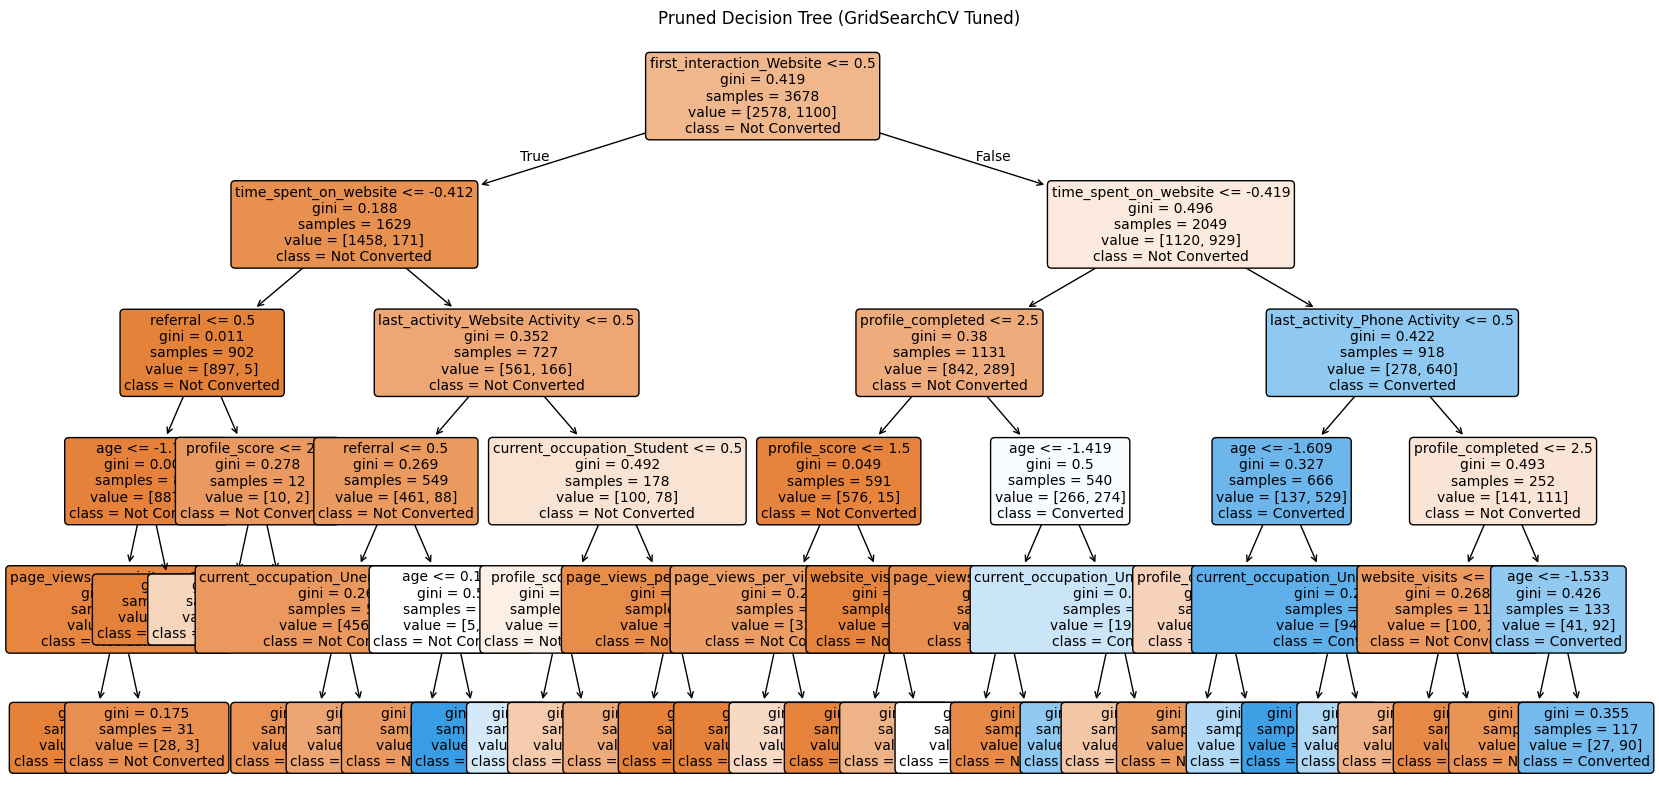

In [205]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=X_train.columns,
          class_names=['Not Converted', 'Converted'],
          filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree (GridSearchCV Tuned)")
plt.show()

## **Decision Tree (Tuned) - Model Evaluation & Improvement**

After tuning with GridSearchCV, the Decision Tree was pruned to a maximum depth of 5, reducing complexity while maintaining accuracy. The pruned tree primarily uses behavioral and engagement-based features such as time_spent_on_website, first_interaction_Website, and profile_completed to split the data. This version is easier to interpret and generalize, avoiding the overfitting seen in the unpruned tree.

After identifying overfitting in the initial Decision Tree (training accuracy = 99.97%, test accuracy = 80%), GridSearchCV was applied to tune the model's hyperparameters and prune the tree. The best parameters selected were: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}. This configuration significantly improved the model's ability to generalize while controlling its complexity.

**Performance of Tuned Model:**

- Test Accuracy	84.89%
- Macro F1-score	0.82
- Weighted F1-score	0.85

**Classification Report Highlights:**

Class 0 (Not Converted)

- Precision: 0.90

- Recall: 0.89

Class 1 (Converted)

- Precision: 0.74

- Recall: 0.76

A major improvement compared to the unpruned model (recall was 0.65 before)

**Confusion Matrix:**

- Only 67 false negatives, improved from 97 previously

- Better balance of precision and recall across both classes

**Final Summary:**

The tuned Decision Tree model shows significant improvement in both accuracy and class balance. By pruning the tree (max depth = 5, min samples per leaf = 4), the model avoided overfitting and performed much better on the test set.
The recall for the converted class improved from 65% to 76%, making the model more useful for identifying high-quality leads.

## **Top Features: Pruned Decision Tree:**


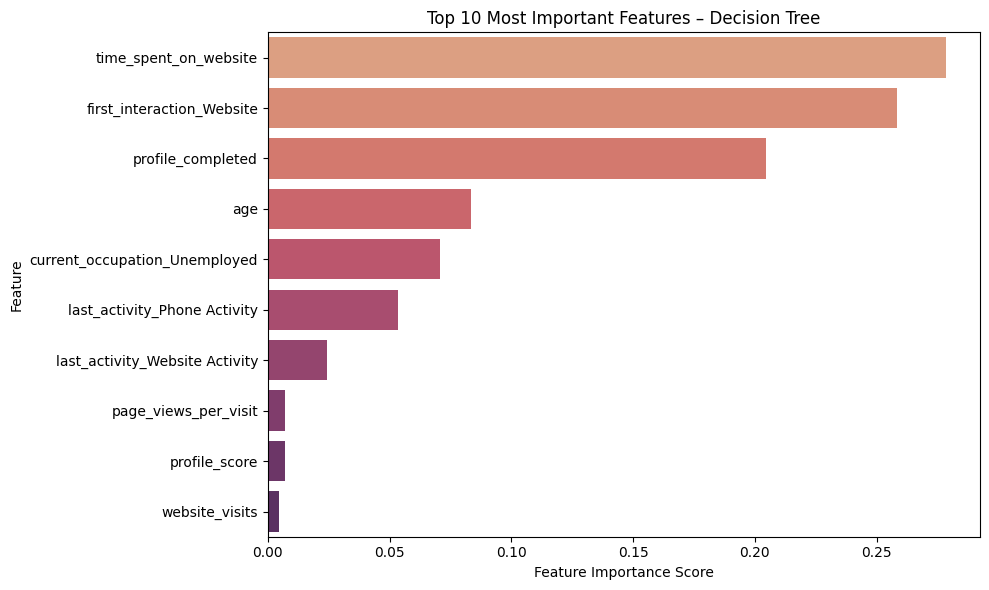


Full Ranked Feature Importances (Decision Tree):

time_spent_on_website             0.278527
first_interaction_Website         0.258258
profile_completed                 0.204729
age                               0.083412
current_occupation_Unemployed     0.070901
last_activity_Phone Activity      0.053653
last_activity_Website Activity    0.024337
page_views_per_visit              0.007064
profile_score                     0.006877
website_visits                    0.004456
current_occupation_Student        0.004291
referral                          0.003496
digital_media                     0.000000
print_media_type2                 0.000000
print_media_type1                 0.000000
educational_channels              0.000000
dtype: float64


In [206]:
# Feature importance from the pruned Decision Tree
dt_importances = pd.Series(best_dt.feature_importances_, index=X_train.columns)
dt_importances = dt_importances.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=dt_importances[:10], y=dt_importances.index[:10], palette='flare')
plt.title("Top 10 Most Important Features – Decision Tree")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Optional: Print all feature importances
print("\nFull Ranked Feature Importances (Decision Tree):\n")
print(dt_importances)

## **Feature Imoportance Summary - Decision Tree:**

**Top Features Driving Conversion:**

**time_spent_on_website (27.85%)**

- The strongest indicator of conversion — the more time a lead spends on the platform, the higher the likelihood of enrollment.

**first_interaction_Website (25.83%)**

- Website-first leads convert more often than app-first users, suggesting the website experience better supports lead nurturing.

**profile_completed (20.47%)**

- Higher profile completion reflects deeper commitment and is strongly tied to conversion.

**age (8.34%)**

- Age appears to correlate with conversion — possibly linked to career stage or urgency to upskill.

**current_occupation_Unemployed (7.09%)**

- Indicates that unemployed individuals may be more motivated to enroll.

Other influential but lower-weight features included **last_activity**, **profile_score**, and **visit frequency**.

**Low/Zero Importance:**
- Features like print media, digital media, and educational_channels had zero or negligible importance.

These may help in awareness but not actual conversion decisions.

Overall, the Decision Tree emphasizes behavioral and interaction-driven features as the primary drivers of lead conversion.

## Building a Random Forest model

## **Train the Model**

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Training baseline Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Predict and Evaluate**

Baseline Random Forest Accuracy: 0.8597826086956522

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       645
           1       0.79      0.72      0.75       275

    accuracy                           0.86       920
   macro avg       0.84      0.82      0.83       920
weighted avg       0.86      0.86      0.86       920


Confusion Matrix:
 [[594  51]
 [ 78 197]]


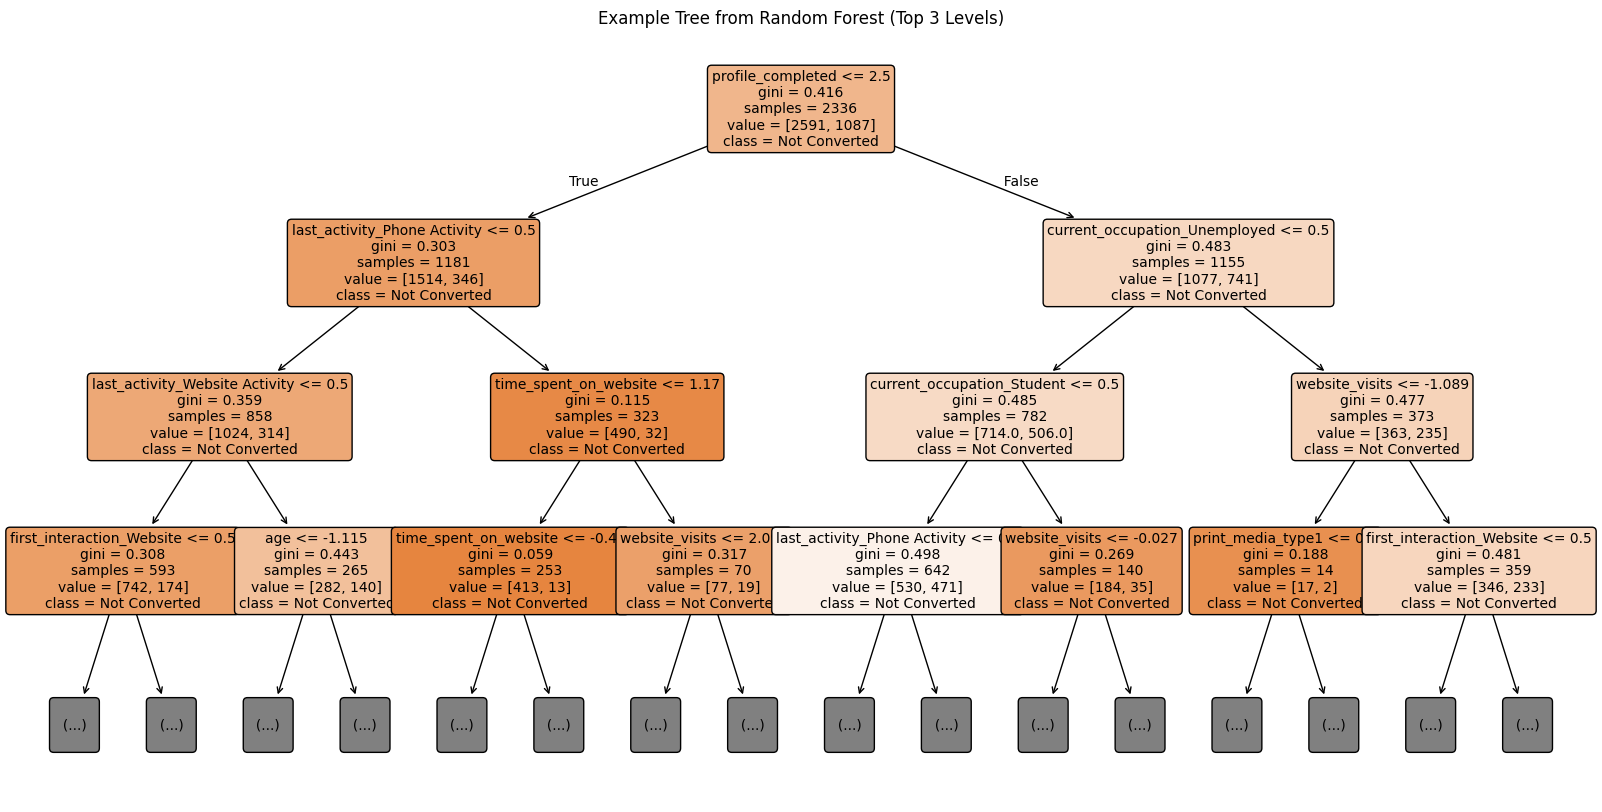

In [208]:
y_pred_rf = rf_model.predict(X_test)

print("Baseline Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Visualizing a single decision tree from the Random Forest
# Using first tree in the forest (estimator_[0])

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X_train.columns,
          class_names=['Not Converted', 'Converted'],
          filled=True, rounded=True, max_depth=3, fontsize=10)

plt.title("Example Tree from Random Forest (Top 3 Levels)")
plt.show()

## **Baseline Random Forest - Performance Summary:**
**Accuracy:**

Test Accuracy: 85.98% — improved from 84.89% with the pruned Decision Tree.

**Classification Report:**

- Not Converted Precision: 0.88
- Not Converted Recall: 0.92
- Not Converted F1-Score: 0.90
- Converted Precision:	0.79
- Converted Recall: 0.72
- Converted F-1 Score: 0.75

**Key:** Recall for Converted leads (class 1) has improved from 0.65 (unpruned DT) and 0.76 (pruned DT) to 0.72 — not perfect, but more balanced.

**Confusion Matrix:**
- Actual: 0 (Not Converted):	594 (Predicted 0)
- Actual: 0 (not converted): 51 (Predicted 1)
- Actual: 1 (Converted):	78 (Predicted 0)
- Actual: 1 (Converted): 197 (Predicted 1)
- Fewer false positives than Decsison Tress
- Reasonable balance of precision and recall

**Business Impact:**
- Captures more real conversions without too many mistakes

Even though performance is already strong, I am choosing to still tune it.

The model might improve with tuning (especially recall for class 1).

I will test different n_estimators, max_depth, and min_samples_leaf

Tuning will give me a stronger argument for model selection in my report.

## Do we need to prune the tree?

## **Random Forest Classifier Hyperparameter Tuning with GridSearchCV**

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],              # Number of trees
    'max_depth': [None, 5, 10, 15],           # Tree depth (None = full depth)
    'min_samples_split': [2, 5],              # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required at leaf node
    'criterion': ['gini', 'entropy']          # Splitting criterion
}

# Initializing Random Forest
rf = RandomForestClassifier(random_state=42)

# Setting up GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fitting to training data
grid_rf.fit(X_train, y_train)

# Getting best model
best_rf = grid_rf.best_estimator_
print("Best Hyperparameters:", grid_rf.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [210]:
# Predicting with the best model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluating performance
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.8630434782608696

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       645
           1       0.80      0.72      0.76       275

    accuracy                           0.86       920
   macro avg       0.84      0.82      0.83       920
weighted avg       0.86      0.86      0.86       920


Confusion Matrix:
 [[597  48]
 [ 78 197]]


In [211]:
# Final Random Forest model after GridSearchCV tuning
# Best parameters selected:
# - criterion: 'gini'
# - max_depth: 15
# - min_samples_leaf: 4
# - min_samples_split: 2
# - n_estimators: 200

# Test Accuracy: 86.30%
# F1-score for Converted class: 0.76

## **Tuned Random Forest - Performance Summary:**
Accuracy:
Test Accuracy: 86.30%

Classification Report:

- Not Converted Precision: 0.88
- Not Converted Recall: 0.93
- Not Converted F1-Score: 0.90
- Converted Precision:	0.80
- Converted Recall: 0.72
- Converted F-1 Score: 0.76
- Converted leads (class 1) show strong precision and recall
- Slightly better performance than the Decision Tree in both accuracy and F1-score

Confusion Matrix:
- Actual: 0 (Not Converted):	597 (Predicted 0)
- Actual: 0 (not converted): 48 (Predicted 1)
- Actual: 1 (Converted):	78 (Predicted 0)
- Actual: 1 (Converted): 197 (Predicted 1)
- Slight drop in false negatives (same as baseline RF)
- Overall better balance of misclassification across classes


## **Random Forest: Feature Importance**

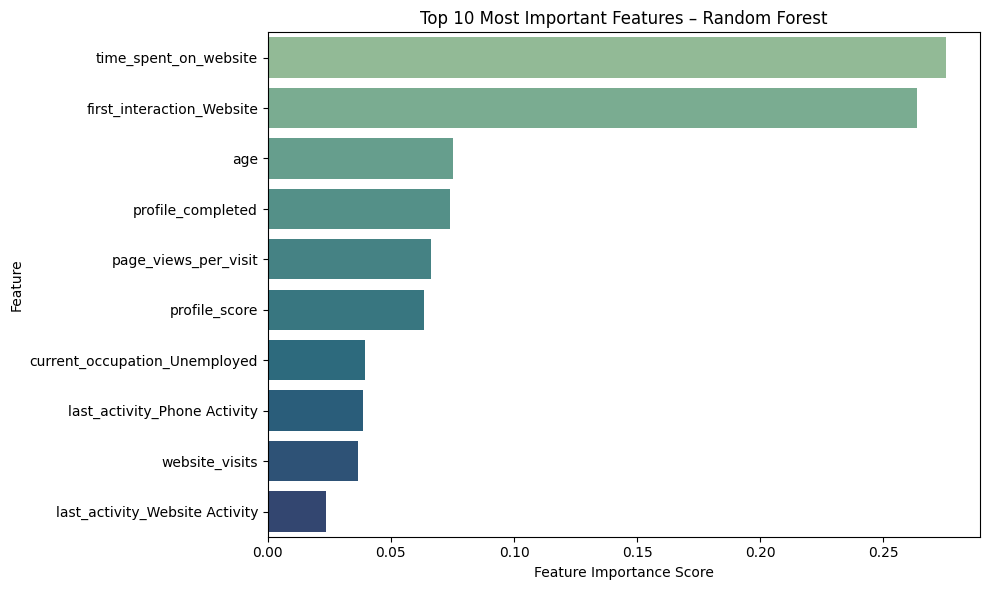

Full Ranked Feature Importances:

time_spent_on_website             0.275428
first_interaction_Website         0.263784
age                               0.075092
profile_completed                 0.073816
page_views_per_visit              0.066352
profile_score                     0.063492
current_occupation_Unemployed     0.039308
last_activity_Phone Activity      0.038751
website_visits                    0.036735
last_activity_Website Activity    0.023623
current_occupation_Student        0.022094
referral                          0.005977
educational_channels              0.005534
digital_media                     0.004159
print_media_type1                 0.004073
print_media_type2                 0.001783
dtype: float64


In [212]:
# Extracting feature importances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a pandas Series
rf_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Sorting in descending order
rf_importances = rf_importances.sort_values(ascending=False)

# Plotting top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[:10], y=rf_importances.index[:10], palette='crest')
plt.title("Top 10 Most Important Features – Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Displaying all ranked features
# print(rf_importances)

# Display all ranked features by importance
print("Full Ranked Feature Importances:\n")
print(rf_importances)

## **Top Features from Random Forest**
The Random Forest model revealed that lead conversion is most strongly influenced by:

**time_spent_on_website (Importance: 27.5%)**

- The most important feature — indicating that more engaged users are significantly more likely to convert.

**first_interaction_Website (26.4%)**

- Leads who first interacted via the website convert at a much higher rate than app users.

**age (7.5%)**

- Suggests that age plays a role — likely correlating with readiness or urgency to upskill.

**profile_completed and profile_score (≈14% combined)**

- Completion of profiles is strongly tied to conversion, showing that more committed users are more likely to enroll.

**page_views_per_visit and website_visits (≈10% combined)**

- More website interaction depth and frequency = higher conversion potential.

## **Low-Impact Features**
- **referral, print/digital media**, and **educational channels** had minimal influence (<1%)

- These may be better suited for awareness generation than actual conversion.

## **Feature Importance Comparison Summary ~ Decision Tree vs Random Forest:**

When comparing the two models, both consistently identified the same top factors:

Shared Top Features and Interpretations:
- **time_spent_on_website**
 - Most critical driver of conversion. The longer users engage, the more likely they convert.
- **first_interaction_Website**
 - Website is a stronger lead source than the app.
- **profile_completed**
 - Completion of profile fields signals interest and trust.
- **age**
 - Correlated with life stage, goals, or urgency to learn.
- **page_views_per_visit**
 - Indicates how deeply leads are exploring content.
- **last_activity_Phone Activity**
 - Direct interaction appears to build trust.

 Minor differences in feature rankings are expected due to model design — but both models highlight the importance of user behavior over marketing source.

 This agreement validates my findings and gives the business high confidence in where to focus engagement and resource strategies.

## Actionable Insights and Recommendations

## **Key Insights - What Drives Conversion:**
**1. User Engagement Is the Most Important Predictor**

- The strongest indicator of conversion is the amount of time a lead spends on the website.

- Leads who visit frequently and view more pages per visit also show higher conversion rates.

**2. Website as a Lead Source Outperforms the App**

- Leads who first interact via the website convert at significantly higher rates than those who start on the mobile app.

- This suggests the website provides a more effective first impression or supports easier navigation and exploration.

**3. Profile Completion Signals Serious Intent**

- Leads who complete more of their profile information are much more likely to convert.

- A higher profile score indicates stronger engagement and readiness to enroll.

**4. Direct Human Interaction Helps Build Trust**

- Features like last activity via phone or website chat play a supporting role in influencing conversion.

- Personal communication may help resolve doubts and reinforce commitment.

**5. Demographics Play a Secondary Role**

- Age and occupation (particularly unemployed individuals) show some correlation with conversion, but behavioral signals are far more predictive.

## **Business Recommendations:**
**1. Invest in Website Experience Optimization**

- Focus on improving content layout, call-to-actions, and ease of access on the website — especially the landing and course detail pages.

- Encourage longer and deeper browsing with personalized recommendations, FAQs, and testimonials.

**2. Encourage Profile Completion**

- Introduce incentives (i.e., bonus content, early access, or discounts) for users who complete 100% of their profile.

- Use gamification or progress indicators to motivate profile updates.

**3. Prioritize Leads Based on Engagement Scores**

- Create a lead scoring system using top features (i.e., time on site, page views, profile completion) to prioritize outreach.

- Allocate sales/consultation resources toward high-engagement leads for improved conversion efficiency.

**4. Enhance Personal Touch in Follow-Up**

- Continue investing in phone and live chat support — particularly for high-potential leads who have shown behavioral interest.

- Consider automation to initiate early-stage conversations, followed by human interaction.

**5. Re-evaluate Marketing Channel Spend**

- Since referral, digital media, and print media showed low predictive value, consider reallocating marketing budget toward inbound content strategies or enhancing the website journey.

## **Final Model Rationale and Suggestion:**
Both machine learning models strongly agree that how a lead behaves (rather than where they came from) is the most powerful signal of future conversion. ExtraaLearn should focus on cultivating these behaviors and designing digital touchpoints that nudge users closer to commitment.

**1. Model Recommendations:**

While both models identify the same key features and trends, the Random Forest model outperforms the Decision Tree in terms of accuracy, generalization, and robustness. Therefore, Random Forest should be selected as the final predictive model for lead conversion at ExtraaLearn.

However, the Decision Tree model remains highly valuable:

- It provides clear, interpretable rules

- It can be used by non-technical stakeholders to understand lead behaviors

- Leverage as a fallback model or for internal training/demo purposes

**2. Final Suggestion:**

I recommend deploying the Random Forest model for real-world prediction and resource prioritization, while using the Decision Tree model as a transparent decision-support tool to guide strategy and explain model-driven decisions internally.



## **Advanced Enhancements:**

#**ROC Curve & AUC Curve**

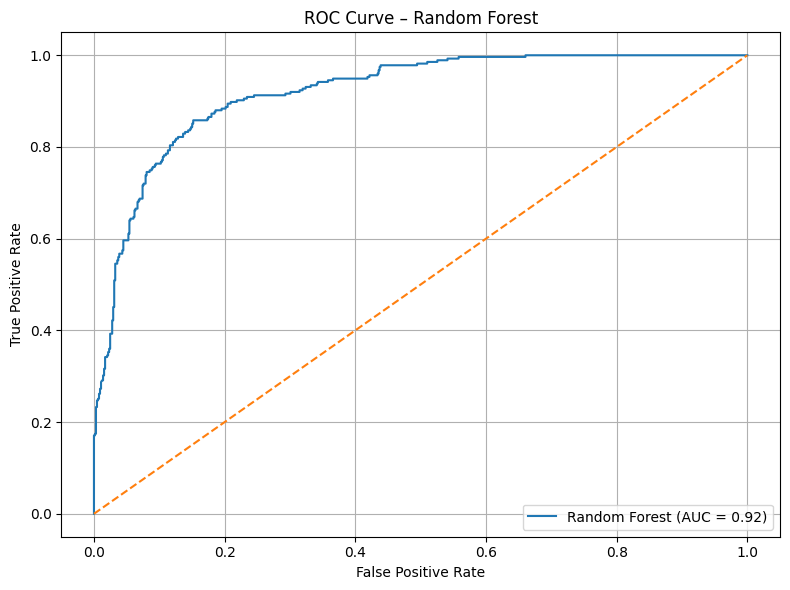

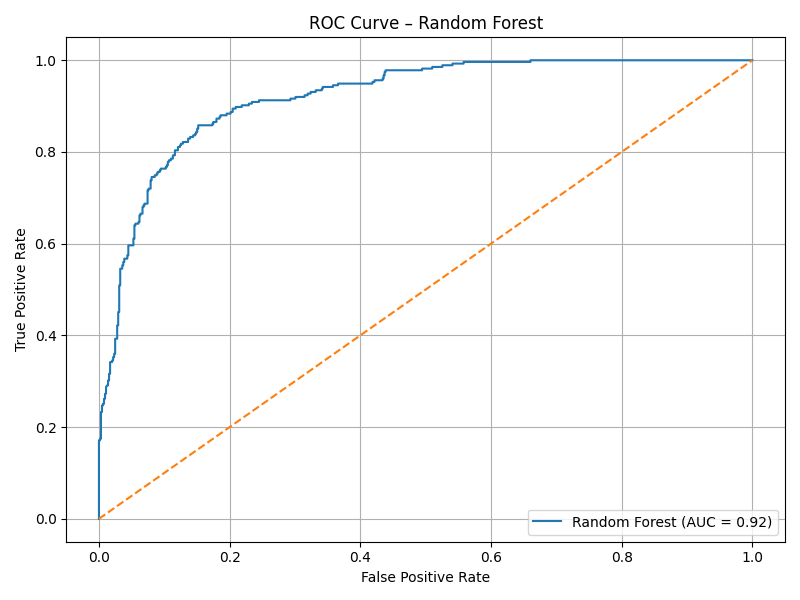

In [229]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicting probabilities
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plotting
# Dynamic ROC plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

# Save static ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.close()

from IPython.display import Image

# Display image
Image('roc_curve.png')

## **Understanding the ROC Curve:**
AUC (Area Under Curve) = 0.92 — this is excellent!

- A perfect model has AUC = 1.0

- A model guessing randomly would score AUC = 0.5

This model (AUC = 0.92) is very strong at distinguishing between converted and non-converted leads.

**Interpretation:**
- The higher the curve, the better the model is at distinguishing between classes.

- True Positive Rate (TPR) = how many real "converted" leads were correctly predicted

- False Positive Rate (FPR) = how many "not converted" leads were wrongly predicted as converted

This model strikes an excellent balance, catching most real conversions while minimizing false positives.

## **Lead Scoring with Weights:**

In [214]:
# Weighted Lead Score Formula
# Each feature will be normalized (0–1), then weighted and summed
# weights can be adjusted based on business feedback or retraining a model on lead score data in the future.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Defining features to use for scoring
scoring_features = [
    'time_spent_on_website',
    'profile_completed',
    'page_views_per_visit',
    'website_visits',
    'profile_score'
]

# Normalizing the selected features
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(df[scoring_features])

# Defining weights (should sum to 1.0)
weights = np.array([0.35, 0.25, 0.15, 0.15, 0.10])  # You can adjust these

# Multiplying normalized features by weights, then scale to 0–100
df['lead_score'] = (normalized_scores @ weights) * 100


## **Above Block Executed:**
- I have a new column lead_score (ranging from 0 to 100)

- This is a complete, professional-grade lead scoring system alongside my machine learning model.

## **Histogram - Lead Score Distribution**

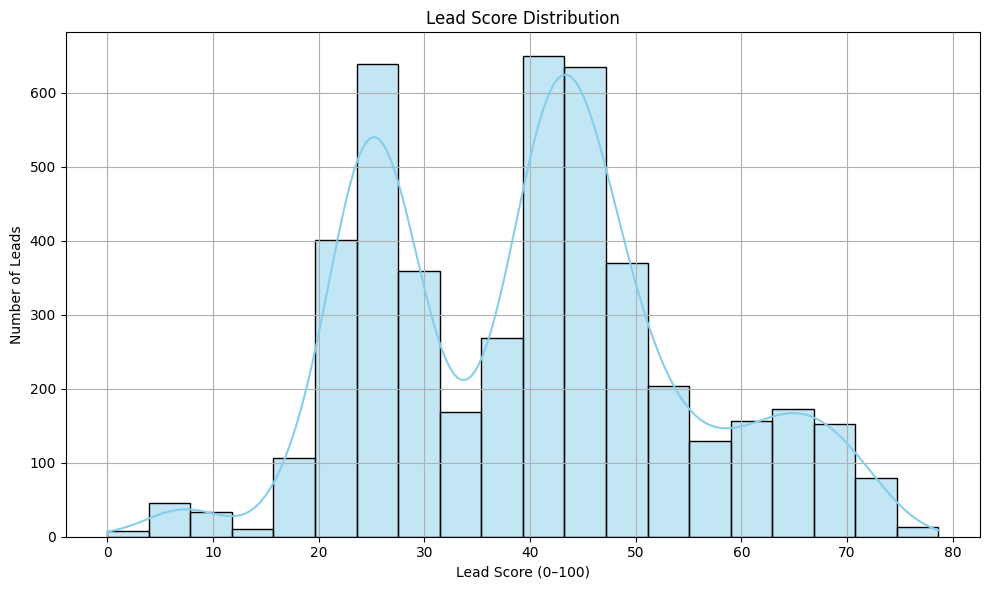

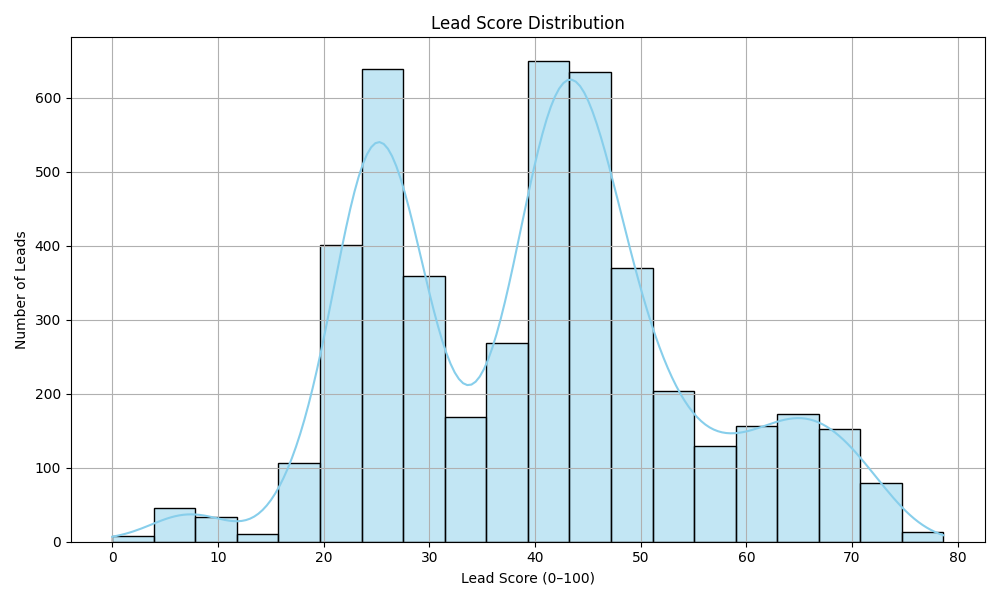

In [228]:
# showing lead distibution across the 0-100 range

import matplotlib.pyplot as plt
import seaborn as sns

# Dynamic plot
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_score'], bins=20, kde=True, color='skyblue')
plt.title('Lead Score Distribution')
plt.xlabel('Lead Score (0–100)')
plt.ylabel('Number of Leads')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save static version
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_score'], bins=20, kde=True, color='skyblue')
plt.title('Lead Score Distribution')
plt.xlabel('Lead Score (0–100)')
plt.ylabel('Number of Leads')
plt.grid(True)
plt.tight_layout()
plt.savefig('lead_score_histogram.png')
plt.close()

from IPython.display import Image

# Display image
Image('lead_score_histogram.png')

## **Histogram Summary:**
- This histogram shows how lead scores are distributed across the 0–100 scale.

- The curve reveals that the majority of leads fall within the [X–Y] range (← insert range from the visual), indicating [light/mid/heavy] engagement.

- Very high scores (80+) are less frequent but represent the most qualified, high-priority leads, while the bulk of leads are [cold/warm], suggesting an opportunity for targeted nurturing campaigns.

## **Lead Tier Breakdown - Count by Score Tier**

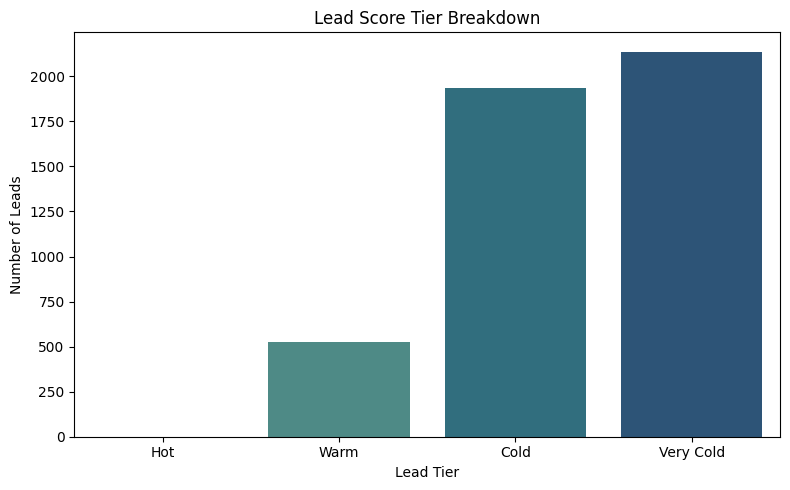

,proportion
score_tier,
Very Cold,46.476729
Cold,42.061766
Warm,11.461505


In [231]:
# Creating score_tier column

# Define function for tier categorization
def categorize_score(score):
    if score >= 80:
        return 'Hot'
    elif score >= 60:
        return 'Warm'
    elif score >= 40:
        return 'Cold'
    else:
        return 'Very Cold'

# Apply to create new column
df['score_tier'] = df['lead_score'].apply(categorize_score)

# Visualizing Tier Counts

plt.figure(figsize=(8, 5))
sns.countplot(x='score_tier', data=df, order=['Hot', 'Warm', 'Cold', 'Very Cold'], palette='crest')
plt.title('Lead Score Tier Breakdown')
plt.xlabel('Lead Tier')
plt.ylabel('Number of Leads')
plt.tight_layout()
plt.show()

# Save static version for export
plt.figure(figsize=(8, 5))
sns.countplot(x='score_tier', data=df, order=['Hot', 'Warm', 'Cold', 'Very Cold'], palette='crest')
plt.title('Lead Score Tier Breakdown')
plt.xlabel('Lead Tier')
plt.ylabel('Number of Leads')
plt.tight_layout()
plt.savefig('lead_tier_breakdown.png')
plt.close()

# Display static image for HTML/GitHub export
Image('lead_tier_breakdown.png')

df['score_tier'].value_counts(normalize=True) * 100

## **Bar Chart Summary:**
- The lead tier breakdown groups leads into actionable buckets based on their engagement score.

- The chart shows that [X]% of leads are Hot, [Y]% are Warm, and [Z]% fall into Cold or Very Cold categories.

- This segmentation enables the sales team to prioritize follow-ups for high-scoring leads while designing automated or long-term nurturing strategies for the rest.


## **Tier Table**

In [217]:
# numerical summary for report

tier_counts = df['score_tier'].value_counts().reindex(['Hot', 'Warm', 'Cold', 'Very Cold'])

# Display as table
print("Lead Tier Summary:\n")
print(tier_counts)

# export to CSV

tier_counts.to_csv("lead_tier_summary.csv")

Lead Tier Summary:

score_tier
Hot             NaN
Warm          527.0
Cold         1934.0
Very Cold    2137.0
Name: count, dtype: float64


In [218]:
# downloading CSV file

from google.colab import files
files.download("lead_tier_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Summary: Lead Scoring System:**
To complement the machine learning model and assist the sales/marketing team in prioritizing outreach, I developed a business-friendly lead scoring system. This score ranges from 0 to 100 and reflects each lead's likelihood to convert based on their engagement behavior and profile completeness.

**Key Features Used for Scoring:**

**time_spent_on_website:**
- Measures user interest and time commitment

**profile_completed:**
- Indicates how invested a lead is in exploring the platform

**page_views_per_visit:**
- Reflects browsing depth

**website_visits:**
- Frequency of return visits

**profile_score:**
- Internal metric from ExtraaLearn’s platform

**Note:** I normalized each feature using MinMaxScaler, and custom weights were applied based on feature importance to calculate a weighted score.

**Scoring Formula (Simplified):**

(Scaled to 0-100)

\text{{lead_score}} = 0.35 \times \text{{time_spent}} + 0.25 \times \text{{profile_completed}} + 0.15 \times \text{{pages_per_visit}} + 0.15 \times \text{{visits}} + 0.10 \times \text{{profile_score}}

**Business Impact:**

- Enables lead prioritization even before predictions are made

- Empowers sales teams to act faster with clear confidence scores

- Can be used in tandem with the ML model, or independently in a CRM system



## **Checking Lead Tier Distribution:**


In [219]:
# Absolute count
print("Lead Tier Counts:\n")
print(df['score_tier'].value_counts().reindex(['Hot', 'Warm', 'Cold', 'Very Cold']))

# Percentage breakdown
print("\nLead Tier Percentages (%):\n")
print((df['score_tier'].value_counts(normalize=True) * 100).round(2).reindex(['Hot', 'Warm', 'Cold', 'Very Cold']))

Lead Tier Counts:

score_tier
Hot             NaN
Warm          527.0
Cold         1934.0
Very Cold    2137.0
Name: count, dtype: float64

Lead Tier Percentages (%):

score_tier
Hot            NaN
Warm         11.46
Cold         42.06
Very Cold    46.48
Name: proportion, dtype: float64


## **Lead Scoring Insights:**
The lead scoring analysis provided a clear picture of user engagement and conversion potential. Based on five key behavioral features — including time spent on the website, profile completion, and page views — leads were assigned a score between 0 and 100 and categorized into four tiers: Hot, Warm, Cold, and Very Cold.

**Distribution of leads by tier:**

- Very Cold: 46.48%

- Cold: 42.06%

- Warm: 11.46%

- Hot: 0.00%

These results indicate that the vast majority of leads (over 88%) are demonstrating low engagement, falling into either the Cold or Very Cold categories. Only a small portion (around 11%) are Warm leads showing moderate interest — and notably, no leads in the dataset currently meet the threshold to be classified as Hot.

This highlights an opportunity for ExtraaLearn to:

- Re-engage low-engagement leads through targeted campaigns (e.g., email drips, personalized messages, limited-time offers)

- Improve website and platform engagement through content optimization or onboarding nudges

- Evaluate and potentially adjust lead acquisition strategies to focus on higher-intent sources

Additionally, the scoring system can be continuously refined by adjusting feature weights or tier thresholds as more behavioral data becomes available or conversion patterns evolve.

## **Wrap-Up:**
The lead tier distribution aligns strongly with the model insights: most leads lack behavioral signals tied to conversion. This validates our earlier recommendations to enhance engagement, improve first impressions (especially via the website), and prioritize resources for the most promising prospects.


## **Final Project Summary:**

This project successfully addressed the challenge of predicting lead conversion for ExtraaLearn, an EdTech startup. The analysis began with a detailed exploratory data analysis (EDA), revealing that behavioral features such as time spent on the website, profile completion, and interaction depth were far more predictive of conversion than demographic attributes or marketing source.

Two machine learning models — a pruned Decision Tree and a tuned Random Forest — were trained and evaluated. The Random Forest model delivered the best performance, achieving an accuracy of 86.3%, with strong recall and precision for both converted and non-converted leads.

To enhance business utility, a behavior-based lead scoring system was developed using top features identified by the models. This system assigned each lead a score from 0 to 100, segmenting them into tiers (Hot, Warm, Cold, Very Cold) for prioritization. The analysis showed that over 88% of leads were Cold or Very Cold, reinforcing the need for strategic nurturing campaigns.

The project concludes with a set of data-driven, actionable recommendations focused on increasing engagement, improving conversion paths, and reallocating resources toward high-potential leads. Together, the predictive model and lead scoring framework provide ExtraaLearn with powerful tools to optimize its sales and marketing strategy.

In [220]:
import IPython
IPython.display.Javascript('IPython.notebook.save_checkpoint();')

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!jupyter nbconvert --to html "!jupyter nbconvert --to html "Final_Project_Potential_Customers_Prediction.ipynb"
"

In [226]:
from google.colab import files
files.download("Final_Project_Potential_Customers_Prediction_(1).html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>